In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Perceptron architecture
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        x = self.fc(x)
        x = torch.sigmoid(x)
        return x

In [3]:
# Training loop
def train_perceptron(model, criterion, optimizer, data, targets, epochs=100):
    for epoch in range(epochs):
        model.train()
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        
        # Optimization step: update weights
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [4]:
# Predict outputs
def test_perceptron(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        predicted = outputs.round().squeeze()
        return predicted

In [5]:
# Sample data (AND logic gate)
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [7]:
# Instantiate the perceptron model
input_dim = data.shape[1]  # number of input features
perceptron = Perceptron(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(perceptron.parameters(), lr=0.1)

In [19]:

train_perceptron(perceptron, criterion, optimizer, data, targets, epochs=30)

Epoch [10/30], Loss: 0.4076
Epoch [20/30], Loss: 0.3980
Epoch [30/30], Loss: 0.3890


In [20]:
# Predict outputs
predicted = test_perceptron(perceptron, data)
print(f'Predicted: {predicted.numpy()}')
print(f'Targets: {targets.squeeze().numpy()}')

Predicted: [0. 0. 0. 1.]
Targets: [0. 0. 0. 1.]


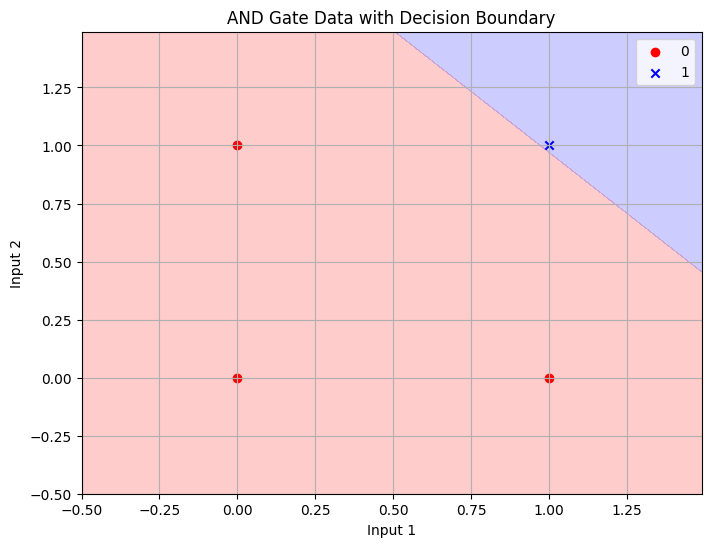

In [21]:
plt.figure(figsize=(8, 6))

# Scatter plot for AND gate data
for i in range(data.shape[0]):
    if targets[i] == 0:
        plt.scatter(data[i, 0].item(), data[i, 1].item(), color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(data[i, 0].item(), data[i, 1].item(), color='blue', marker='x', label='1' if i == 3 else "")
        
# Generate a grid of points
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict outputs for the grid points
with torch.no_grad():
    zz = perceptron(grid).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])

plt.title('AND Gate Data with Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()